In [80]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df = pd.read_csv('C:/Users/User/Desktop/data science/data sets/income.csv')
df.head()

,Name,Age,Income($)
0,rob,27,70000
1,michel,29,90000
2,mohan,29,61000
3,ismail,28,60000
4,kory,42,150000


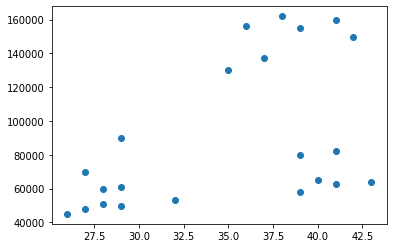

In [82]:
plt.scatter(df.Age,df['Income($)'])

In [83]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [85]:
df['cluster'] = y_pred

In [86]:
df.head()

,Name,Age,Income($),cluster
0,rob,27,70000,2
1,michel,29,90000,2
2,mohan,29,61000,0
3,ismail,28,60000,0
4,kory,42,150000,1


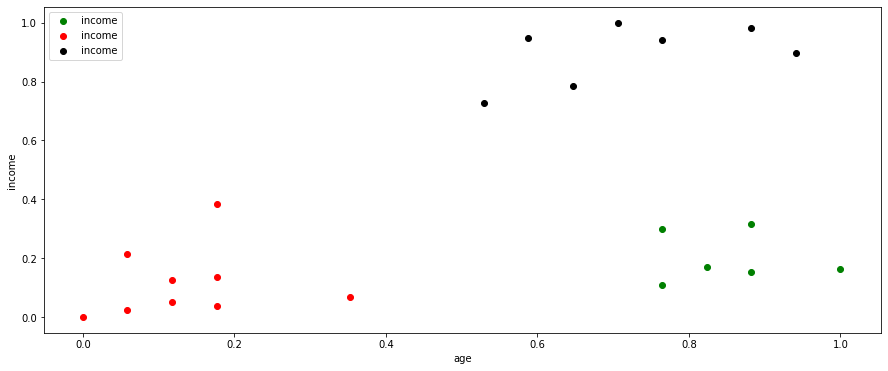

In [105]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.figure(figsize=(15,6))
plt.scatter(df1.Age,df1['Income($)'],color='green',label='income')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='income')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='income')

plt.xlabel('age')
plt.ylabel('income')
plt.legend(loc=2)
plt.show()

In [106]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])


scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,rob,0.058824,0.213675,1
1,michel,0.176471,0.384615,1
2,mohan,0.176471,0.136752,1
3,ismail,0.117647,0.128205,1
4,kory,0.941176,0.897436,2
5,gautam,0.764706,0.940171,2
6,david,0.882353,0.982906,2
7,andrea,0.705882,1.000000,2
8,brad,0.588235,0.948718,2
9,angelina,0.529412,0.726496,2


In [107]:
km = KMeans(n_clusters=3)

y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [108]:
df['cluster'] = y_pred
df.drop('cluster',axis=1)
df

,Name,Age,Income($),cluster
0,rob,0.058824,0.213675,0
1,michel,0.176471,0.384615,0
2,mohan,0.176471,0.136752,0
3,ismail,0.117647,0.128205,0
4,kory,0.941176,0.897436,1
5,gautam,0.764706,0.940171,1
6,david,0.882353,0.982906,1
7,andrea,0.705882,1.000000,1
8,brad,0.588235,0.948718,1
9,angelina,0.529412,0.726496,1


In [109]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

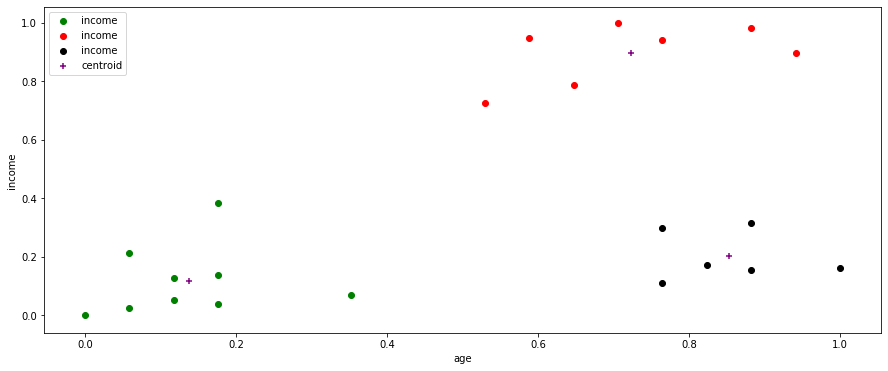

In [110]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.figure(figsize=(15,6))
plt.scatter(df1.Age,df1['Income($)'],color='green',label='income')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='income')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.xlabel('age')
plt.ylabel('income')
plt.legend(loc=2)

In [111]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [112]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2766936276300278,
 0.23472396003560048,
 0.16858512236029755,
 0.1376250414652804,
 0.10383752586603558]